In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',20)

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
for columns in df.columns:
    print(df[columns].value_counts())
    print("*"*50)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**************************************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
**************************************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype:

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [8]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


### Filling Null Values

In [9]:
# there is only one missing value in this as we have info above.. replacing it with any other value.
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [10]:
df['location'].fillna('Electronic City',inplace=True)

We have some variables with range in size, so coverting them into their mean.

In [18]:
sorted(df['total_sqft'].unique())

['1',
 '1.25Acres',
 '1.26Acres',
 '1000',
 '1000 - 1285',
 '10000',
 '1000Sq. Meter',
 '1001',
 '1002',
 '1003',
 '10030',
 '1004',
 '1004 - 1204',
 '1005',
 '1005.03 - 1252.49',
 '1006',
 '1007',
 '1008',
 '1009',
 '1010',
 '1010 - 1300',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1015 - 1540',
 '1016',
 '1017',
 '1018',
 '1019',
 '1020',
 '1020 - 1130',
 '1020.07',
 '10200',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1039',
 '1040',
 '1041',
 '1042 - 1105',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '1050',
 '1051',
 '1052',
 '1052 - 1322',
 '1053',
 '1053.4',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1060',
 '1061',
 '1062',
 '10624',
 '1063',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '1070',
 '1070 - 1315',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1076 - 1199',
 '1077',
 '1078',
 '1079',
 '1079 - 1183',
 '1080',
 '1081',
 

In [12]:
def convertrange(x):
    temp=x.split('-')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        # so that all the values will get convert into float.
        return float(x)
    except:
        pass

In [13]:
df['total_sqft_copy']=df['total_sqft']

In [14]:
df['total_sqft_copy']=df['total_sqft_copy'].apply(convertrange)

In [15]:
df[df['total_sqft_copy'].isna()]

,location,size,total_sqft,bath,price,total_sqft_copy
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.5,NaN
648,Arekere,9 Bedroom,4125Perch,9.0,265.0,NaN
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.0,NaN
872,Singapura Village,2 BHK,1100Sq. Yards,2.0,45.0,NaN
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.0,NaN
...,...,...,...,...,...,...
11615,arudi,3 Bedroom,6Acres,2.0,80.0,NaN
12186,7th Phase JP Nagar,2 BHK,120Sq. Yards,2.0,51.0,NaN
12252,Gowdanapalya,5 BHK,24Sq. Meter,5.0,75.0,NaN
12560,Hosa Road,3 BHK,142.84Sq. Meter,3.0,110.0,NaN


because there are some values in total sq_ft with different units that are need to be convert otherwise can not be passed to the model, so dropping these values.

In [19]:
df.dropna(subset={'total_sqft_copy'},inplace=True)

In [20]:
df['total_sqft']=df['total_sqft_copy']

In [21]:
df.drop(columns=['total_sqft_copy'],inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13274 non-null  object 
 1   size        13258 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13201 non-null  float64
 4   price       13274 non-null  float64
dtypes: float64(3), object(2)
memory usage: 622.2+ KB


In [24]:
# in size, there are 16 missing values
df['size'].isna().sum()

16

In [25]:
# in size, there are 16 missing values
df[df['size'].isna()]

,location,size,total_sqft,bath,price
579,Sarjapur Road,NaN,1800.0,NaN,34.185
1775,IVC Road,NaN,3817.0,NaN,124.000
2264,Banashankari,NaN,2400.0,NaN,460.000
2809,Sarjapur Road,NaN,1800.0,NaN,28.785
2862,Devanahalli,NaN,1950.0,NaN,46.800
5333,Devanahalli,NaN,3752.5,NaN,177.115
6423,Whitefield,NaN,2324.0,NaN,26.730
6636,Jigani,NaN,1500.0,NaN,25.490
6719,Hoskote,NaN,1730.0,NaN,28.545
7680,Kasavanhalli,NaN,5000.0,NaN,400.000


In [26]:
# first converting size from object to int
df['bhk']=df['size'].dropna().str.split().str.get(0).astype(int)

In [27]:
df[df['bath'].isna()]

,location,size,total_sqft,bath,price,bhk
56,Devanahalli,4 Bedroom,3210.0,NaN,192.000,4.0
81,Hennur Road,4 Bedroom,3203.5,NaN,224.500,4.0
224,Devanahalli,3 BHK,1630.0,NaN,74.820,3.0
344,Kanakpura Road,1 BHK,525.0,NaN,21.530,1.0
579,Sarjapur Road,NaN,1800.0,NaN,34.185,NaN
...,...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525.0,NaN,27.000,1.0
11569,Hosur Road,NaN,1350.0,NaN,8.440,NaN
12768,Bettahalsoor,5 Bedroom,3210.0,NaN,353.000,5.0
12861,KR Puram,4 BHK,2283.0,NaN,121.000,4.0


now, we will replace the missing values of bath and size using linear regr.
but analyzing the data before that.

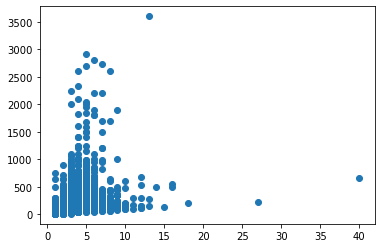

In [29]:
plt.scatter(df['bath'],df['price'])

In [171]:
df[df['bath']>=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43.0


Basically these two are outliers, so removing this.

In [30]:
df=df.drop(df[df['bath']>=20].index)

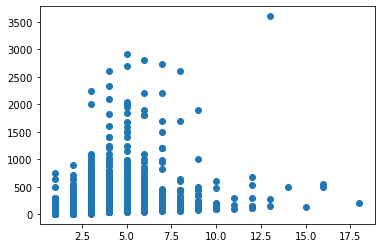

In [31]:
plt.scatter(df['bath'],df['price'])

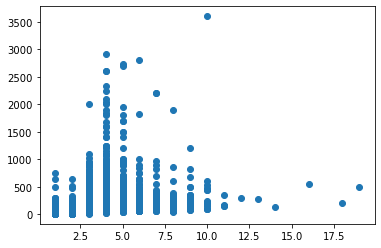

In [174]:
plt.scatter(df['bhk'],df['price'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13272 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13272 non-null  object 
 1   size        13256 non-null  object 
 2   total_sqft  13272 non-null  float64
 3   bath        13199 non-null  float64
 4   price       13272 non-null  float64
 5   bhk         13256 non-null  float64
dtypes: float64(4), object(2)
memory usage: 725.8+ KB


In [33]:
df2=df.dropna()

In [34]:
df.corr()

,total_sqft,bath,price,bhk
total_sqft,1.000000,0.401741,0.575965,0.357820
bath,0.401741,1.000000,0.467411,0.888117
price,0.575965,0.467411,1.000000,0.409327
bhk,0.357820,0.888117,0.409327,1.000000


as per the corelation, only the bath and bhk are correlated good, so we will use them only for the prediction

In [35]:
X=df2[['bhk']]

In [36]:
Y=df2['bath']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [38]:
scores=[]
for i in range(1000):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    ypredict=lr.predict(xtest)
    scores.append(r2_score(ytest,ypredict))

In [39]:
print(np.argmax(scores),'-'*5,scores[np.argmax(scores)])

428 ----- 0.8275592542026113


In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=428)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypredict=lr.predict(xtest)
r2_score(ytest,ypredict)

0.8275592542026113

using this model lr, we will fill the na values in df for bath column

In [42]:
df['bhk'].fillna(df['bhk'].median(),inplace=True)

In [43]:
df['size']=df['bhk']

In [44]:
df.drop(columns=['bhk'],inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13272 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13272 non-null  object 
 1   size        13272 non-null  float64
 2   total_sqft  13272 non-null  float64
 3   bath        13199 non-null  float64
 4   price       13272 non-null  float64
dtypes: float64(4), object(1)
memory usage: 622.1+ KB


In [46]:
df3=df[df['bath'].isna()]

In [47]:
df3.head(75)

,location,size,total_sqft,bath,price
56,Devanahalli,4.0,3210.0,NaN,192.000
81,Hennur Road,4.0,3203.5,NaN,224.500
224,Devanahalli,3.0,1630.0,NaN,74.820
344,Kanakpura Road,1.0,525.0,NaN,21.530
579,Sarjapur Road,3.0,1800.0,NaN,34.185
...,...,...,...,...,...
11496,Kanakpura Road,1.0,525.0,NaN,27.000
11569,Hosur Road,3.0,1350.0,NaN,8.440
12768,Bettahalsoor,5.0,3210.0,NaN,353.000
12861,KR Puram,4.0,2283.0,NaN,121.000


In [48]:
W=df3[['size']]

In [49]:
zpredic=lr.predict(W)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- size
Feature names seen at fit time, yet now missing:
- bhk

  warnings.warn(message, FutureWarning)


In [50]:
zpredic=np.round(zpredic)

In [51]:
df3['bath']=zpredic

C:\Users\DELL\AppData\Local\Temp/ipykernel_6224/558502977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bath']=zpredic


In [52]:
df3.head(75)

,location,size,total_sqft,bath,price
56,Devanahalli,4.0,3210.0,4.0,192.000
81,Hennur Road,4.0,3203.5,4.0,224.500
224,Devanahalli,3.0,1630.0,3.0,74.820
344,Kanakpura Road,1.0,525.0,1.0,21.530
579,Sarjapur Road,3.0,1800.0,3.0,34.185
...,...,...,...,...,...
11496,Kanakpura Road,1.0,525.0,1.0,27.000
11569,Hosur Road,3.0,1350.0,3.0,8.440
12768,Bettahalsoor,5.0,3210.0,5.0,353.000
12861,KR Puram,4.0,2283.0,4.0,121.000


In [53]:
for i in df3.index:
    df['bath'].loc[df.index==i]=df3['bath']

C:\Users\DELL\AppData\Local\Temp/ipykernel_6224/3893025391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'].loc[df.index==i]=df3['bath']


In [64]:
df=df.reset_index(drop=True)

In [65]:
df.head(13300)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00
...,...,...,...,...,...
13267,Whitefield,5.0,3453.0,4.0,231.00
13268,Richards Town,4.0,3600.0,5.0,400.00
13269,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00
13270,Padmanabhanagar,4.0,4689.0,4.0,488.00


In [66]:
df['location'].value_counts()

Whitefield               538
Sarjapur  Road           399
Electronic City          303
Kanakpura Road           271
Thanisandra              233
                        ... 
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Bapuji Layout              1
Abshot Layout              1
Name: location, Length: 1298, dtype: int64

there are 1298 values, we can not send these values directly to our model.

So the location which will be less than or 10 occurance will be renamed as Other.

In [67]:
df['location']=df['location'].apply(lambda x:x.strip())
# Stripping means to truncate the value
Location_count=df['location'].value_counts()

In [68]:
Location_count_less_10=Location_count[Location_count<10]
Location_count_less_10

Chandra Layout               9
Mathikere                    9
2nd Phase JP Nagar           9
KUDLU MAIN ROAD              9
Ejipura                      9
                            ..
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
IVC Road                     1
Lakshmipura Vidyaanyapura    1
Abshot Layout                1
Name: location, Length: 1033, dtype: int64

In [69]:
df['location']=df['location'].apply(lambda x:'Other' if x in Location_count_less_10 else x)

In [70]:
df['location'].value_counts()

Other                   2735
Whitefield               539
Sarjapur  Road           399
Electronic City          305
Kanakpura Road           271
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Basapura                  10
Sector 1 HSR Layout       10
Nagadevanahalli           10
Name: location, Length: 255, dtype: int64

Here our location count value reduced from 1033 to 255.

In [72]:
df.describe()

,size,total_sqft,bath,price
count,13272.000000,13272.000000,13272.000000,13272.000000
mean,2.798071,1559.078114,2.689195,112.403542
std,1.225493,1237.214493,1.280404,149.002311
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1276.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,120.000000
max,19.000000,52272.000000,18.000000,3600.000000


here we can see that minimum value of total_sqft is 1. which is not possible obviously. so, we need to check how many of the total_sqft are not possible,

The minimum area required for 1 bhk is 300sqft. So, we will check the area per bhk for every data and will select only those which are more or equal to 300.


In [73]:
(df['total_sqft']/df['size']).describe()

count    13272.000000
mean       574.686049
std        387.567839
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

Here we can see that minimum area per bhk is 0.25 that is not feasible. so removing these.

In [74]:
df=df[(df['total_sqft']/df['size'])>=300]

In [75]:
df.describe()

,size,total_sqft,bath,price
count,12530.000000,12530.000000,12530.000000,12530.000000
mean,2.652115,1594.564544,2.566401,111.382401
std,0.976480,1261.271296,1.080348,152.077329
min,1.000000,300.000000,1.000000,8.440000
25%,2.000000,1116.000000,2.000000,49.000000
50%,3.000000,1300.000000,2.000000,70.000000
75%,3.000000,1700.000000,3.000000,115.000000
max,16.000000,52272.000000,16.000000,3600.000000


In [76]:
df.rename(columns={'size':'bhk'},inplace=True)

In [78]:
df['price_per_sqft']=df['price']*10000/df['total_sqft']

In [79]:
df.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,2.652115,1594.564544,2.566401,111.382401,630.397936
std,0.976480,1261.271296,1.080348,152.077329,416.223798
min,1.000000,300.000000,1.000000,8.440000,26.782981
25%,2.000000,1116.000000,2.000000,49.000000,421.052632
50%,3.000000,1300.000000,2.000000,70.000000,529.411765
75%,3.000000,1700.000000,3.000000,115.000000,691.666667
max,16.000000,52272.000000,16.000000,3600.000000,17647.058824


In [81]:
df.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,369.981061
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,461.538462
2,Uttarahalli,3.0,1440.0,2.0,62.00,430.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,624.589086
4,Kothanur,2.0,1200.0,2.0,51.00,425.000000
5,Whitefield,2.0,1170.0,2.0,38.00,324.786325
6,Old Airport Road,4.0,2732.0,4.0,204.00,746.705710
7,Rajaji Nagar,4.0,3300.0,4.0,600.00,1818.181818
8,Marathahalli,3.0,1310.0,3.0,63.25,482.824427
10,Whitefield,3.0,1800.0,2.0,70.00,388.888889


{'whiskers': [<matplotlib.lines.Line2D at 0x1f83e8683a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83e868a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83e8680d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83e868ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83e8741f0>],
 'means': []}

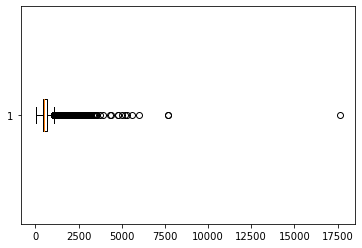

In [80]:
plt.boxplot(df['price_per_sqft'],vert=False)

Now from this, we can see that by calculating price per sqft, we are getting outliers. so removing this by selecting the only values that are under +-2.5 of standard deviation with mean.

In [168]:
def remove_outliers_sqft(df_sample):
    df_output=pd.DataFrame()
    for key,subdf in df_sample.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-2.5*st))&(subdf.price_per_sqft<=(m+2.5*st))]
        df_output=pd.concat([df_output,gen_df])
    return df_output

In [169]:
df2=df.copy()

In [170]:
df2=remove_outliers_sqft(df2)

In [176]:
df2=df2.sort_index()

In [172]:
df2.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000
mean,2.625890,1572.996767,2.537214,103.397924,601.308230
std,0.949671,1191.218121,1.048853,122.859948,303.543001
min,1.000000,300.000000,1.000000,9.000000,26.782981
25%,2.000000,1114.000000,2.000000,48.720000,419.638009
50%,3.000000,1300.000000,2.000000,69.000000,524.079320
75%,3.000000,1691.200000,3.000000,110.000000,676.056338
max,16.000000,52272.000000,16.000000,2736.000000,3229.166667


{'whiskers': [<matplotlib.lines.Line2D at 0x1f83f877850>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83f877c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f841f23760>],
 'medians': [<matplotlib.lines.Line2D at 0x1f840f1ad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f840f1a820>],
 'means': []}

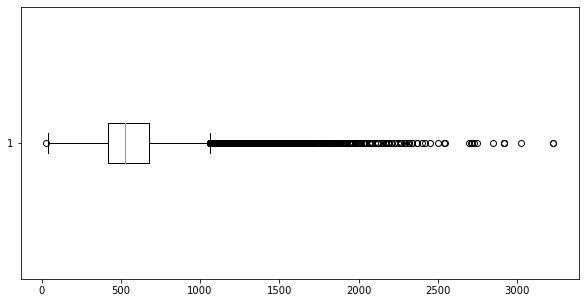

In [173]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['price_per_sqft'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f840fd9cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f840fd97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f840fd97c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f842632430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8426320d0>],
 'means': []}

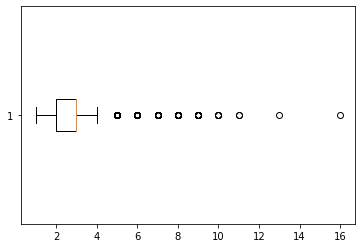

In [174]:
plt.boxplot(df2['bhk'],vert=False)

In [166]:
for z,w in df2.groupby('location'):
    stats={}
    for x,y in w.groupby('bhk'):
        stats[x]={
            'mean':np.mean(y.price_per_sqft),
            'std':np.std(y.price_per_sqft),
            'count':y.shape[0]
        }
    print(z,stats)

1st Block Jayanagar {2.0: {'mean': 899.1902834008097, 'std': 299.1902834008097, 'count': 2}, 3.0: {'mean': 1045.064951663878, 'std': 234.14421492809987, 'count': 4}, 4.0: {'mean': 1595.1533460274063, 'std': 161.56957599256685, 'count': 4}}
1st Block Koramangala {2.0: {'mean': 663.0043553291149, 'std': 150.75413601798462, 'count': 3}, 3.0: {'mean': 594.0307328605202, 'std': 299.58628841607566, 'count': 2}, 4.0: {'mean': 2134.463276836158, 'std': 700.5623519178279, 'count': 5}}
1st Phase JP Nagar {1.0: {'mean': 595.2380952380952, 'std': 0.0, 'count': 1}, 2.0: {'mean': 793.1806799837383, 'std': 153.41422783514054, 'count': 8}, 3.0: {'mean': 915.1192151725821, 'std': 105.47317260216454, 'count': 7}, 4.0: {'mean': 1091.6599530851618, 'std': 601.5260686226975, 'count': 4}, 5.0: {'mean': 1078.7878787878788, 'std': 512.1212121212122, 'count': 2}}
2nd Phase Judicial Layout {1.0: {'mean': 495.23809523809524, 'std': 0.0, 'count': 1}, 2.0: {'mean': 413.8888888888889, 'std': 65.79288490181673, 'cou

Kannamangala {2.0: {'mean': 532.2837525877165, 'std': 83.54193808205981, 'count': 8}, 3.0: {'mean': 631.7050282058996, 'std': 103.3787384882574, 'count': 7}, 4.0: {'mean': 588.5746398752179, 'std': 55.591269688658635, 'count': 3}}
Karuna Nagar {2.0: {'mean': 614.9479659413435, 'std': 0.0, 'count': 1}, 3.0: {'mean': 899.8216968601849, 'std': 365.14520165882556, 'count': 10}, 4.0: {'mean': 465.51724137931035, 'std': 0.0, 'count': 1}}
Kasavanhalli {1.0: {'mean': 569.0909090909091, 'std': 0.0, 'count': 1}, 2.0: {'mean': 547.2590297514636, 'std': 91.40416825026861, 'count': 32}, 3.0: {'mean': 613.8199686172801, 'std': 196.0707495116213, 'count': 40}, 4.0: {'mean': 718.8150786398396, 'std': 88.84937505820679, 'count': 6}}
Kasturi Nagar {2.0: {'mean': 604.1583372234744, 'std': 65.38682870762743, 'count': 6}, 3.0: {'mean': 591.6740546308524, 'std': 72.15559950179525, 'count': 5}, 4.0: {'mean': 1120.294960327679, 'std': 681.176783196791, 'count': 3}}
Kathriguppe {2.0: {'mean': 550.0, 'std': 0.0

In [182]:
def bhk_outlier_remove(df):
    exclude_data=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stat=bhk_stats.get(bhk-1)
            if stat and stat['count']>5:
                exclude_data=np.append(exclude_data,bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return df.drop(exclude_data,axis='index')

In [183]:
df2=bhk_outlier_remove(df2)

In [184]:
df2.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000
mean,2.565121,1567.263504,2.530847,116.660587,665.517937
std,0.991320,1024.207134,1.095994,140.180937,332.705319
min,1.000000,300.000000,1.000000,9.000000,116.666667
25%,2.000000,1100.000000,2.000000,50.000000,458.791760
50%,2.000000,1277.000000,2.000000,77.000000,587.871287
75%,3.000000,1721.500000,3.000000,125.000000,744.860470
max,16.000000,30400.000000,16.000000,2736.000000,3229.166667


In [185]:
df2.drop(columns=['price_per_sqft'],inplace=True)

In [186]:
df2=df2.reset_index(drop=True)

In [228]:
df2.to_csv('Cleaned House Data.csv')

In [187]:
df2.head(20000)

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Uttarahalli,3.0,1440.0,2.0,62.00
2,Lingadheeranahalli,3.0,1521.0,3.0,95.00
3,Kothanur,2.0,1200.0,2.0,51.00
4,Old Airport Road,4.0,2732.0,4.0,204.00
...,...,...,...,...,...
8602,Green Glen Layout,3.0,1715.0,3.0,112.00
8603,Other,4.0,3600.0,5.0,400.00
8604,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00
8605,Padmanabhanagar,4.0,4689.0,4.0,488.00


In [188]:
X=df2.drop(columns=['price'])
Y=df2['price']

In [189]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [193]:
one=OneHotEncoder()
one.fit(X[['location']])
one.categories_

[array(['1st Block Jayanagar', '1st Block Koramangala',
        '1st Phase JP Nagar', '2nd Phase Judicial Layout',
        '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
        '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
        '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
        'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
        'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
        'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
        'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
        'Badavala Nagar', 'Balagere', 'Banashankari',
        'Banashankari Stage II', 'Banashankari Stage III',
        'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
        'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
        'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
        'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
        'Bhoga

In [199]:
colmn_trans=make_column_transformer((OneHotEncoder(categories=one.categories_,sparse=False),['location']),remainder='passthrough')

In [195]:
scaler=StandardScaler()

In [196]:
lr2=LinearRegression()

In [200]:
pipe=make_pipeline(colmn_trans,scaler,lr2)

### Linear Regression

In [207]:
scores=[]
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr2=LinearRegression()
    pipe.fit(xtrain,ytrain)
    ypredict=pipe.predict(xtest)
    scores.append(r2_score(ytest,ypredict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

In [208]:
print(np.argmax(scores),'-'*20,scores[np.argmax(scores)])

32 -------------------- 0.8132786110350108


In [210]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=32)
lr2=LinearRegression()
pipe.fit(xtrain,ytrain)
ypredict=pipe.predict(xtest)
r2_score(ytest,ypredict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.8132786110350108

### Lasso Regression

In [217]:
ls=Lasso()

In [218]:
pipe2=make_pipeline(colmn_trans,scaler,ls)

In [225]:
scores=[]
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    ls=Lasso()
    pipe2.fit(xtrain,ytrain)
    ypredict2=pipe2.predict(xtest)
    scores.append(r2_score(ytest,ypredict2))

In [219]:
print(np.argmax(scores),'-'*20,scores[np.argmax(scores)])

32 -------------------- 0.8065052614795538


In [226]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=32)
ls=Lasso()
pipe2.fit(xtrain,ytrain)
ypredict2=pipe2.predict(xtest)
r2_score(ytest,ypredict2)

0.8065052614795538

### Ridge Regression

In [223]:
ri=Ridge()
pipe3=make_pipeline(colmn_trans,scaler,ri)

In [227]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=32)
pipe3.fit(xtrain,ytrain)
ypredict3=pipe3.predict(xtest)
r2_score(ytest,ypredict3)

0.8133090909215095

In [246]:
pipe2.predict(pd.DataFrame([['Green Glen Layout',3.0,1715.0,3.0]],columns=['location','bhk','total_sqft','bath']))

array([118.32671878])